In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../scripts')
import ml_gwas

## Train RSE (80% samples, 50% features) with 500 SVMs

#### Single step to train RSE on sample data

In [2]:
''' 
ensemble, df_features, df_amr = ml_gwas.train_ensemble(
    allele_table_path='../sample_data/strain_by_allele_binary_SA.csv.gz', 
    amr_path='../sample_data/strain_by_amr_SA.csv.gz', 
    antibiotic='ciprofloxacin', 
    gene_path='../sample_data/strain_by_gene_SA.csv.gz',
    core_cutoff=10, bootstrap_instances=0.8, bootstrap_features=0.5, 
    num_models=500)
''';

#### Multiple steps showing training data and RSE object

In [3]:
''' Load the gene, allele, and AMR binary matrices '''
antibiotic = 'ciprofloxacin'
df_features, df_amr = ml_gwas.__prepare_amr_data__(
    allele_table_path='../sample_data/strain_by_allele_binary_SA.csv.gz', 
    amr_path='../sample_data/strain_by_amr_SA.csv.gz', 
    antibiotic=antibiotic, 
    gene_path='../sample_data/strain_by_gene_SA.csv.gz', core_cutoff=10)

print '\nData specific to', antibiotic, ':'
print 'Genetic feature matrix:', df_features.shape
print 'AMR phenotype matrix:', df_amr.shape

Non-core genes: (288, 2968)
Core-gene alleles: (288, 20390)
Feature table: (288, 23358)

Data specific to ciprofloxacin :
Genetic feature matrix: (216, 23358)
AMR phenotype matrix: (216,)


In [4]:
df_features.head()

,Cluster_100_Allele_0,Cluster_100_Allele_1,Cluster_100_Allele_2,Cluster_100_Allele_3,Cluster_100_Allele_4,Cluster_100_Allele_5,Cluster_100_Allele_6,Cluster_100_Allele_7,Cluster_100_Allele_8,Cluster_100_Allele_9,...,Cluster_969,Cluster_975,Cluster_979,Cluster_980,Cluster_990,Cluster_993,Cluster_994,Cluster_995,Cluster_998,Cluster_999
1280_15931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1280_15938,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1280_15939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1280_16052,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1280_16436,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_amr.head()

Genome ID
1280_15931    1.0
1280_15938    0.0
1280_15939    0.0
1280_16052    0.0
1280_16436    0.0
Name: ciprofloxacin, dtype: float64

In [6]:
''' Define a Random Subspace Ensemble with 500 models, sampling 80% of strains and 50% of features per model '''
ensemble = ml_gwas.RSE(num_models=500, bootstrap_instances=0.8, bootstrap_features=0.5)
ensemble.fit(df_features.values, df_amr.values)

Iteration 50
Iteration 100
Iteration 150
Iteration 200
Iteration 250
Iteration 300
Iteration 350
Iteration 400
Iteration 450
Iteration 500


### Sort features by average weight, postive-first

In [7]:
df_coefs = ensemble.get_coefficient_matrix(feature_names=df_features.columns,reduced=True, order=1)
df_coefs.head(10)

,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10,...,Model_491,Model_492,Model_493,Model_494,Model_495,Model_496,Model_497,Model_498,Model_499,Model_500
Cluster_2151_Allele_0,0.621991,NaN,0.856330,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.320468,...,NaN,NaN,0.878407,0.515588,NaN,NaN,NaN,NaN,NaN,NaN
Cluster_159,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,1.096302,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
Cluster_3356,NaN,NaN,NaN,0.000000,0.066327,NaN,0.501005,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.139760,NaN,NaN,0.000000,NaN,NaN
Cluster_92_Allele_18,NaN,NaN,0.000000,0.000000,0.000000,0.027497,0.000000,NaN,NaN,NaN,...,0.644960,NaN,0.000000,NaN,NaN,NaN,0.714776,0.490316,0.000000,0.186723
Cluster_1782_Allele_0,NaN,NaN,0.000000,0.284052,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.018774,NaN,0.000000,0.000000,0.094985,NaN,0.130612,0.241629
Cluster_2974,NaN,NaN,0.183379,0.000000,0.166786,NaN,NaN,0.223431,0.118032,NaN,...,NaN,NaN,0.030796,NaN,NaN,0.022891,NaN,0.045044,0.184074,NaN
Cluster_2469,NaN,NaN,0.204404,0.000000,NaN,NaN,NaN,0.000000,0.087463,NaN,...,NaN,NaN,0.000000,NaN,0.265224,0.075808,NaN,NaN,NaN,NaN
Cluster_1314_Allele_0,NaN,NaN,NaN,NaN,NaN,0.000000,0.461135,NaN,0.000000,NaN,...,0.339788,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN
Cluster_671,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,...,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
Cluster_567_Allele_0,NaN,0.0,0.000000,NaN,NaN,0.393855,0.026873,NaN,NaN,0.000000,...,0.000000,0.0,0.006336,0.000000,NaN,NaN,0.000000,0.085039,0.000000,NaN


### Sort features by average weight, negative-first

In [8]:
df_coefs = ensemble.get_coefficient_matrix(feature_names=df_features.columns,reduced=True, order=-1)
df_coefs.head(10)

,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10,...,Model_491,Model_492,Model_493,Model_494,Model_495,Model_496,Model_497,Model_498,Model_499,Model_500
Cluster_126_Allele_1,-1.375543,NaN,-0.875105,NaN,-0.280104,-1.462511,-1.475270,-0.233820,-0.918766,NaN,...,NaN,-0.086357,-0.909341,-0.512642,-0.661755,-1.266999,NaN,NaN,-0.344381,NaN
Cluster_279_Allele_0,NaN,0.000000,-0.463688,NaN,-0.291719,0.000000,-0.010311,-0.422832,0.000000,NaN,...,-0.228412,0.000000,-0.820816,NaN,NaN,-0.105061,NaN,NaN,NaN,0.000000
Cluster_2617_Allele_0,NaN,NaN,-0.000013,-0.526486,NaN,NaN,0.000000,NaN,-0.321856,NaN,...,-0.766541,-0.770909,NaN,NaN,NaN,NaN,-0.131044,-0.539144,-0.514259,-0.247737
Cluster_2243_Allele_0,NaN,-0.977624,-0.082885,-0.559920,-0.296246,0.000000,0.000000,NaN,0.000000,-0.675128,...,NaN,NaN,-0.091984,-0.956538,-0.643107,-0.321354,NaN,NaN,NaN,-0.229108
Cluster_1696_Allele_0,0.000000,NaN,NaN,-0.537342,NaN,0.000000,NaN,0.000000,-0.256712,0.000000,...,NaN,NaN,-0.100615,NaN,NaN,NaN,-0.160771,-0.472230,NaN,-0.208713
Cluster_1780_Allele_0,-0.133206,NaN,0.000000,NaN,-0.290649,NaN,NaN,-0.378971,0.000000,NaN,...,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,-0.301217,NaN,-0.081055
Cluster_1028_Allele_0,-0.122694,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,-0.075833,...,NaN,0.000000,NaN,0.000000,0.000000,-0.109385,NaN,NaN,NaN,0.000000
Cluster_168_Allele_1,NaN,0.000000,-0.257124,0.000000,0.000000,NaN,NaN,NaN,-0.108101,NaN,...,NaN,NaN,0.000000,NaN,-0.231295,-0.050356,-0.055886,0.000000,0.000000,-0.406845
Cluster_92_Allele_22,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,-0.031248,NaN,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.468899
Cluster_4362_Allele_0,0.000000,0.000000,0.000000,NaN,-0.278512,0.000000,NaN,0.000000,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN


### Examine individual model MCCs on training samples and out-of-bag samples
(Ensemble tracks which samples were given to which models from the original training set)

In [9]:
''' Can provide own scoring function'''
scores = ensemble.compute_performance(df_features.values, df_amr.values)

/home/user/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Text(0,0.5,'# models')

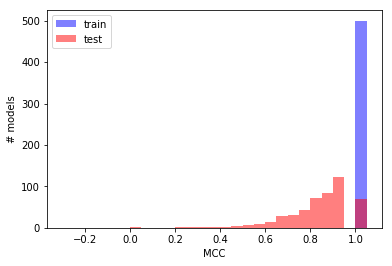

In [10]:
%matplotlib inline
bins=np.arange(-0.3,1.1,0.05)
plt.hist(scores[:,0], bins=bins, label='train', color='blue', alpha=0.5)
plt.hist(scores[:,1], bins=bins, label='test', color='red', alpha=0.5)
plt.legend()
plt.xlabel('MCC')
plt.ylabel('# models')